In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Data Analysis

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv("sample_labels.csv")

In [ ]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168


# Separate disease name

In [ ]:
diseases = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']
#split diseases
for disease in diseases :
    df[disease] = df['Finding Labels'].apply(lambda x: 1 if disease in x else 0).astype(int)

df['No_Finding']=df['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)
df['Finding']=df['Finding Labels'].apply(lambda x: 0 if 'No Finding' in x else 1)

#remove last character in Age
df['Age']=df['Patient Age'].apply(lambda x: x[:-1]).astype(int)
df['Age Type']=df['Patient Age'].apply(lambda x: x[-1:])

np.unique(df['Age Type'], return_counts=True)

df.loc[df['Age Type']=='M',['Age']] = df[df['Age Type']=='M']['Age'].apply(lambda x: round(x/12.)).astype(int)
df.loc[df['Age Type']=='D',['Age']] = df[df['Age Type']=='D']['Age'].apply(lambda x: round(x/365.)).astype(int)

In [ ]:
df.describe()

,Follow-up #,Patient ID,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,Cardiomegaly,Emphysema,Effusion,Hernia,...,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,No_Finding,Finding,Age
count,5606.000000,5606.000000,5606.000000,5606.000000,5606.000000,5606.000000,5606.000000,5606.000000,5606.000000,5606.000000,...,5606.000000,5606.000000,5606.000000,5606.000000,5606.000000,5606.000000,5606.000000,5606.000000,5606.000000,5606.000000
mean,8.616661,14330.617017,2644.795755,2491.087406,0.155467,0.155467,0.025152,0.022654,0.114877,0.002319,...,0.031395,0.050660,0.021049,0.040314,0.172494,0.014984,0.011060,0.542990,0.457010,46.767749
std,15.565815,8411.477789,347.188754,399.119063,0.016201,0.016201,0.156599,0.148812,0.318902,0.048104,...,0.174398,0.219322,0.143560,0.196712,0.377843,0.121499,0.104591,0.498193,0.498193,17.412801
min,0.000000,13.000000,1362.000000,966.000000,0.115000,0.115000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7289.000000,2500.000000,2048.000000,0.143000,0.143000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000
50%,3.000000,13993.000000,2542.000000,2544.000000,0.143000,0.143000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000
75%,10.000000,20655.500000,2992.000000,2991.000000,0.168000,0.168000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59.000000
max,177.000000,30797.000000,3266.000000,3056.000000,0.198800,0.198800,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,411.000000


# Number of each diseases by patient gender

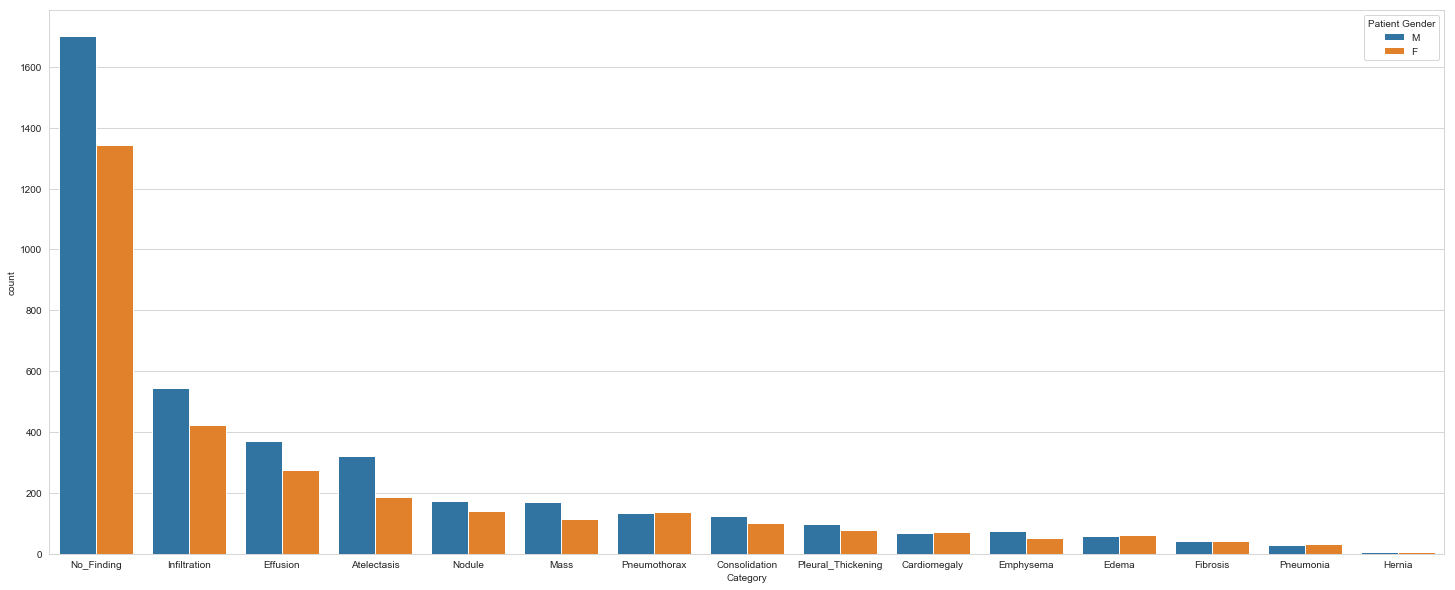

In [ ]:
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
sns.set_style('whitegrid')
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
ax = plt.subplot()

data = pd.melt(df, id_vars=['Patient Gender'], value_vars = list(diseases + ['No_Finding']), var_name = 'Category', value_name = 'Count')
data = data.loc[data.Count>0]

sns.countplot(x='Category',hue='Patient Gender',data=data, ax=ax, order = data['Category'].value_counts().index)

# Distribution of Patient Gender and Finding diseases

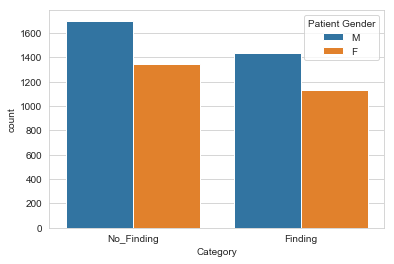

In [ ]:
ax = plt.subplot()

data = pd.melt(df, id_vars=['Patient Gender'], value_vars = list(['Finding', 'No_Finding']), var_name = 'Category', value_name = 'Count')
data = data.loc[data.Count>0]

sns.countplot(x='Category',hue='Patient Gender',data=data, ax=ax, order = data['Category'].value_counts().index)

# Distribution of Patient Gender and View Position

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


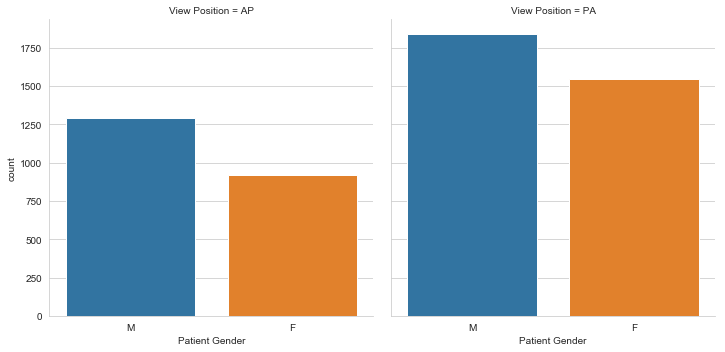

In [ ]:
sns.factorplot(x="Patient Gender", col="View Position",data=df, kind="count");

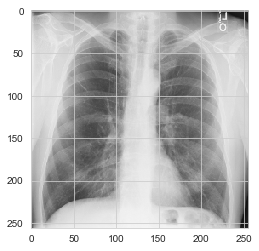

In [ ]:
import matplotlib.pyplot as plt 
import cv2
%matplotlib inline

def show_image(img_path):
    image = cv2.imread(img_path)
    img = cv2.resize(image, (256, 256))
    plt.imshow(img)
    plt.show()

for img_path in df[df['Patient ID'] == 79]['Image Index'].tolist():
    show_image('sample/images/' + img_path)

# Age distribution

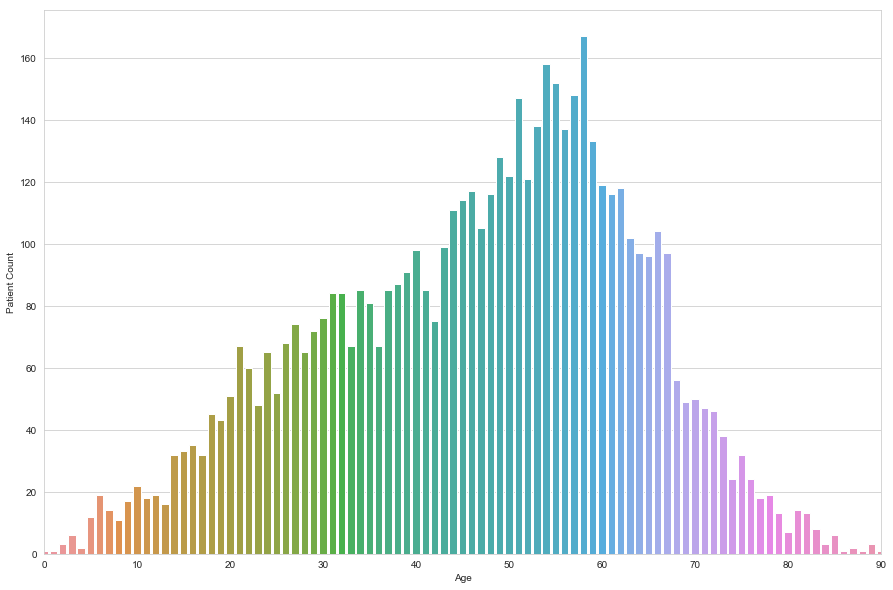

In [ ]:
f, axarr = plt.subplots(1, 1, sharex=True,figsize=(15, 10))
g=sns.countplot(x='Age',data=df)
g.set(xlabel='Age', ylabel='Patient Count')
g.set_xlim(0,90)
g.set_xticks(x)
g.set_xticklabels(x)
f.subplots_adjust(hspace=0.3)

# Distribution of Age for each disease

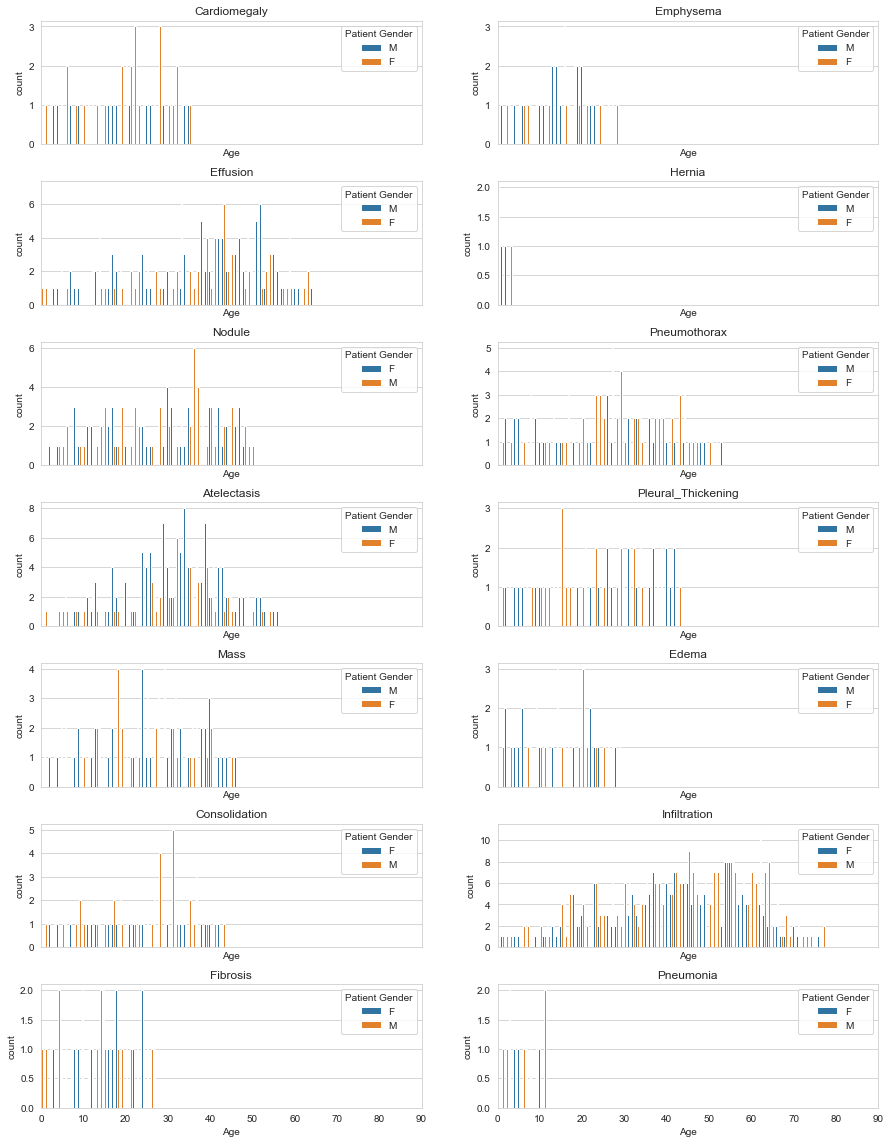

In [ ]:
f, axarr = plt.subplots(7, 2, sharex=True,figsize=(15, 20))

i=0
j=0
x=np.arange(0,100,10)
for pathology in diseases :
    g=sns.countplot(x='Age', hue="Patient Gender",data=df[df['Finding Labels']==pathology], ax=axarr[i, j])
    axarr[i, j].set_title(pathology)   
    g.set_xlim(0,90)
    g.set_xticks(x)
    g.set_xticklabels(x)
    j=(j+1)%2
    if j==0:
        i=(i+1)%7
f.subplots_adjust(hspace=0.3)

# Followup Disribution

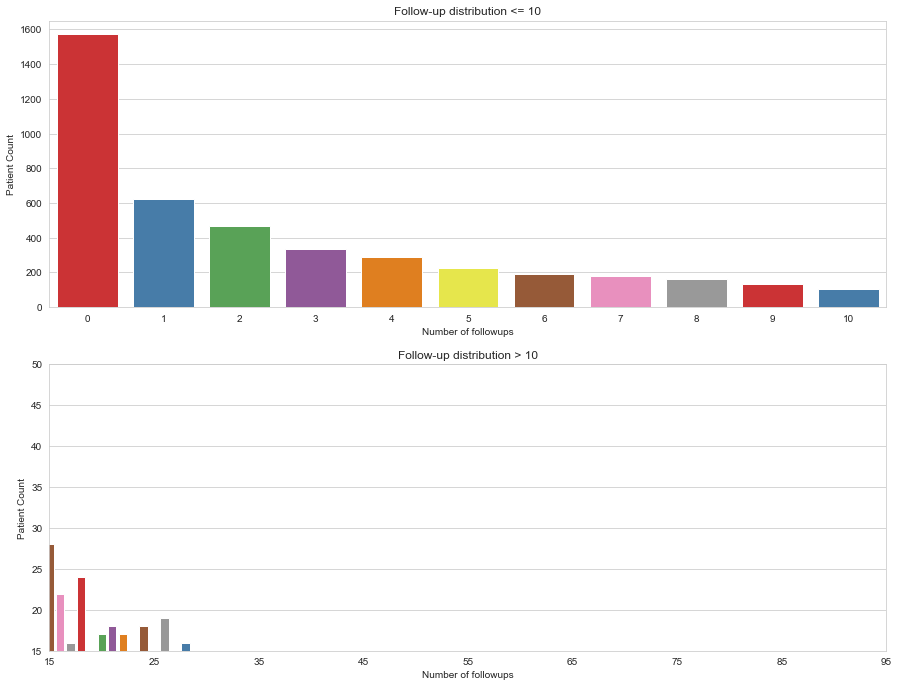

In [ ]:
f, (ax1,ax2) = plt.subplots( 2, figsize=(15, 10))
data = df[df['Follow-up #']<=10]
g = sns.countplot(x='Follow-up #',data=data,palette="Set1",ax=ax1);
g.set(xlabel='Number of followups', ylabel='Patient Count')

ax1.set_title('Follow-up distribution <= 10');
data = df[df['Follow-up #']>10]
g = sns.countplot(x='Follow-up #',data=data,palette="Set1",ax=ax2);
ax2.set_title('Follow-up distribution > 10');

x=np.arange(15,100,10)
g.set(xlabel='Number of followups', ylabel='Patient Count')
g.set_ylim(15,50)
g.set_xlim(15,50)
g.set_xticks(x)
g.set_xticklabels(x)

f.subplots_adjust(top=1)

# Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm
from sklearn.utils import shuffle

df = pd.read_csv('sample_labels.csv')

diseases = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']
#Number diseases
for disease in diseases :
    df[disease] = df['Finding Labels'].apply(lambda x: 1 if disease in x else 0)

# #test to perfect
# df = df.drop(df[df['Emphysema']==0][:-127].index.values)
    
#remove Y after age
df['Age']=df['Patient Age'].apply(lambda x: x[:-1]).astype(int)
df['Age Type']=df['Patient Age'].apply(lambda x: x[-1:])
df.loc[df['Age Type']=='M',['Age']] = df[df['Age Type']=='M']['Age'].apply(lambda x: round(x/12.)).astype(int)
df.loc[df['Age Type']=='D',['Age']] = df[df['Age Type']=='D']['Age'].apply(lambda x: round(x/365.)).astype(int)
# remove outliers
df = df.drop(df['Age'].sort_values(ascending=False).head(1).index)
df['Age'] = df['Age']/df['Age'].max()

#one hot data
# df = df.drop(df.index[4242])
df = df.join(pd.get_dummies(df['Patient Gender']))
df = df.join(pd.get_dummies(df['View Position']))

#random samples
df = shuffle(df)

#get other data
data = df[['Age', 'F', 'M', 'AP', 'PA']]
data = np.array(data)

labels = df[diseases].as_matrix()
files_list = ('F:/Desktop/cse419 project/Dataset/image dataset/' + df['Image Index']).tolist()

# #test to perfect
# labelB = df['Emphysema'].tolist()

labelB = (df[diseases].sum(axis=1)>0).tolist()
labelB = np.array(labelB, dtype=int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


# RGB Images

In [ ]:
from keras.preprocessing import image     
from tqdm import tqdm

def path_to_tensor(img_path, shape):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=shape)
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)/255
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths, shape):
    list_of_tensors = [path_to_tensor(img_path, shape) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

train_labels = labelB[:3400][:, np.newaxis]
valid_labels = labelB[3400:4500][:, np.newaxis]
test_labels = labelB[4500:][:, np.newaxis]

train_data = data[:3400]
valid_data = data[3400:4500]
test_data = data[4500:]

img_shape = (64, 64)
train_tensors = paths_to_tensor(files_list[:3400], shape = img_shape)
valid_tensors = paths_to_tensor(files_list[3400:4500], shape = img_shape)
test_tensors = paths_to_tensor(files_list[4500:], shape = img_shape)

Using TensorFlow backend.

  5%|███▉                                                                           | 167/3400 [00:11<02:46, 19.38it/s]


 10%|███████▌                                                                       | 328/3400 [00:21<03:06, 16.48it/s]


 13%|██████████▍                                                                    | 450/3400 [00:37<20:35,  2.39it/s]


 17%|█████████████▋                                                                 | 588/3400 [00:49<03:03, 15.33it/s]


 23%|█████████████████▉                                                             | 773/3400 [00:59<03:08, 13.90it/s]


 28%|█████████████████████▊                                                         | 940/3400 [01:09<02:23, 17.20it/s]


 33%|█████████████████████████▋                                                    | 1121/3400 [01:18<02:02, 18.54it/s]


 38%|█████████████████████████████▉                                                | 1303/3400 [01:29<02:06, 16.61it/s]


 43%|█████████████████████████████████▉                                            | 1477/3400 [01:39<01:52, 17.05it/s]


 48%|█████████████████████████████████████▏                                        | 1621/3400 [01:50<02:11, 13.52it/s]


 52%|████████████████████████████████████████▍                                     | 1762/3400 [02:01<01:48, 15.17it/s]


 56%|███████████████████████████████████████████▊                                  | 1910/3400 [02:11<02:18, 10.76it/s]


 60%|███████████████████████████████████████████████                               | 2053/3400 [02:23<01:44, 12.95it/s]


 64%|██████████████████████████████████████████████████▎                           | 2193/3400 [02:34<01:32, 13.04it/s]


 69%|█████████████████████████████████████████████████████▌                        | 2336/3400 [02:44<01:23, 12.76it/s]


 73%|████████████████████████████████████████████████████████▉                     | 2481/3400 [02:54<01:20, 11.39it/s]


 77%|████████████████████████████████████████████████████████████                  | 2620/3400 [03:04<00:45, 17.13it/s]


 81%|███████████████████████████████████████████████████████████████▎              | 2759/3400 [03:14<00:41, 15.27it/s]


 85%|██████████████████████████████████████████████████████████████████▌           | 2902/3400 [03:23<00:34, 14.54it/s]


 90%|█████████████████████████████████████████████████████████████████████▉        | 3047/3400 [03:32<00:22, 15.69it/s]


 94%|█████████████████████████████████████████████████████████████████████████▏    | 3189/3400 [03:41<00:12, 17.32it/s]


 98%|████████████████████████████████████████████████████████████████████████████▍ | 3333/3400 [03:51<00:04, 15.56it/s]


  6%|████▊                                                                           | 66/1100 [00:06<01:27, 11.86it/s]


 18%|██████████████▎                                                                | 199/1100 [00:18<01:07, 13.38it/s]


 30%|████████████████████████                                                       | 335/1100 [00:29<01:14, 10.22it/s]


 43%|██████████████████████████████████                                             | 474/1100 [00:41<00:45, 13.67it/s]


 57%|████████████████████████████████████████████▋                                  | 622/1100 [00:51<00:33, 14.26it/s]


 69%|██████████████████████████████████████████████████████▊                        | 763/1100 [01:00<00:20, 16.61it/s]


 82%|████████████████████████████████████████████████████████████████▊              | 903/1100 [01:10<00:14, 13.54it/s]


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1053/1100 [01:20<00:02, 16.17it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 1100/1100 [01:23<00:00, 13.58it/s]

  9%|██████▊                                                                         | 94/1105 [00:07<01:35, 10.59it/s]


 21%|████████████████▊                                                              | 236/1105 [00:18<01:03, 13.61it/s]


 34%|██████████████████████████▉                                                    | 376/1105 [00:27<00:43, 16.68it/s]


 47%|█████████████████████████████████████▏                                         | 521/1105 [00:37<00:40, 14.28it/s]


 60%|███████████████████████████████████████████████▌                               | 665/1105 [00:46<00:27, 15.97it/s]


 73%|█████████████████████████████████████████████████████████▉                     | 811/1105 [00:56<00:20, 14.56it/s]


 86%|████████████████████████████████████████████████████████████████████▏          | 953/1105 [01:05<00:11, 13.05it/s]


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1094/1105 [01:15<00:00, 15.53it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 1105/1105 [01:16<00:00, 14.47it/s]

In [ ]:
import pickle

train_filename = "data_preprocessed/train_data_sample_rgb.p"
pickle.dump((train_labels, train_data, train_tensors), open(train_filename, 'wb'))

valid_filename = "data_preprocessed/valid_data_sample_rgb.p"
pickle.dump((valid_labels, valid_data, valid_tensors), open(valid_filename, 'wb'))

test_filename = "data_preprocessed/test_data_sample_rgb.p"
pickle.dump((test_labels, test_data, test_tensors), open(test_filename, 'wb'))

# GRAY Images

In [ ]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path, shape):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, grayscale=True, target_size=shape)
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 1)
    x = image.img_to_array(img)/255
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 1) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths, shape):
    list_of_tensors = [path_to_tensor(img_path, shape) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

train_labels = labelB[:3400][:, np.newaxis]
valid_labels = labelB[3400:4500][:, np.newaxis]
test_labels = labelB[4500:][:, np.newaxis]

train_data = data[:3400]
valid_data = data[3400:4500]
test_data = data[4500:]

img_shape = (64, 64)
train_tensors = paths_to_tensor(files_list[:3400], shape = img_shape)
valid_tensors = paths_to_tensor(files_list[3400:4500], shape = img_shape)
test_tensors = paths_to_tensor(files_list[4500:], shape = img_shape)


  0%|                                                                                         | 0/3400 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

  0%|                                                                                 | 1/3400 [00:00<18:57,  2.99it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

  0%|                                                                                 | 3/3400 [00:00<14:07,  4.01it/s]C:\P

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

  1%|▊                                                                               | 32/3400 [00:01<03:08, 17.89it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

  1%|▊                                                                               | 34/3400 [00:02<03:07, 17.94it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

  2%|█▍                                                                              | 63/3400 [00:03<04:02, 13.76it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

  2%|█▌                                                                              | 65/3400 [00:03<03:54, 14.21it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

  3%|██▏                                                                             | 93/3400 [00:05<02:41, 20.47it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

  3%|██▎                                                                             | 96/3400 [00:05<02:41, 20.41it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea


  4%|██▉                                                                            | 125/3400 [00:07<02:52, 18.93it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

  4%|██▉                                                                            | 128/3400 [00:07<02:42, 20.16it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

  5%|███▋                                                                           | 158/3400 [00:08<02:47, 19.33it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

  5%|███▋                      

  6%|████▎                                                                          | 188/3400 [00:10<02:51, 18.72it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

  6%|████▍                                                                          | 191/3400 [00:10<02:45, 19.40it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

  6%|█████                                                                          | 220/3400 [00:12<03:20, 15.82it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

  7%|█████▏                                                                         | 222/3400 [00:12<03:23, 15.63it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

  7%|█████▊                                                                         | 252/3400 [00:14<02:52, 18.23it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

  7%|█████▉                                                                         | 254/3400 [00:14<03:47, 13.84it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


  8%|██████▌                                                                        | 282/3400 [00:16<03:00, 17.32it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

  8%|██████▌                                                                        | 284/3400 [00:16<02:53, 17.99it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

  9%|███████▎                                                                       | 316/3400 [00:18<02:54, 17.66it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\sit


 10%|████████                                                                       | 345/3400 [00:20<06:31,  7.81it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 10%|████████                                                                       | 346/3400 [00:20<06:31,  7.80it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 10%|████████                                                                       | 348/3400 [00:20<05:41,  8.94it/s]C:\P

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 11%|████████▋                                                                      | 376/3400 [00:23<04:13, 11.94it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 11%|████████▊                                                                      | 378/3400 [00:23<03:58, 12.67it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 12%|█████████▍                                                                     | 406/3400 [00:25<03:41, 13.51it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 12%|█████████▍                                                                     | 408/3400 [00:25<03:28, 14.35it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 13%|██████████▏                                                                    | 438/3400 [00:28<03:32, 13.94it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 13%|██████████▏                                                                    | 440/3400 [00:28<03:45, 13.11it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 14%|██████████▊                                                                    | 468/3400 [00:30<05:27,  8.96it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 14%|██████████▉                                                                    | 470/3400 [00:30<05:05,  9.59it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 15%|███████████▌                                                                   | 498/3400 [00:34<03:30, 13.76it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 15%|███████████▌                                                                   | 500/3400 [00:34<03:53, 12.41it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 16%|████████████▎                                                                  | 529/3400 [00:36<03:58, 12.05it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 16%|████████████▎                                                                  | 531/3400 [00:36<04:03, 11.76it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 16%|█████████████                                                                  | 560/3400 [00:39<03:45, 12.61it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 17%|█████████████                                                                  | 562/3400 [00:39<04:15, 11.09it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 17%|█████████████▋                                                                 | 591/3400 [00:41<02:53, 16.15it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 17%|█████████████▊                                                                 | 593/3400 [00:41<02:49, 16.55it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 18%|██████████████▍                                                                | 623/3400 [00:43<03:15, 14.18it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 18%|██████████████▌                                                                | 625/3400 [00:43<03:13, 14.36it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 19%|███████████████▏                                                               | 654/3400 [00:46<04:51,  9.41it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 19%|███████████████▏                                                               | 656/3400 [00:46<04:05, 11.18it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 20%|███████████████▉                                                               | 684/3400 [00:48<03:03, 14.78it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 20%|███████████████▉                                                               | 686/3400 [00:48<03:23, 13.31it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 21%|████████████████▋                                                              | 716/3400 [00:50<03:03, 14.66it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 21%|████████████████▋                                                              | 718/3400 [00:50<03:09, 14.14it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 22%|█████████████████▎                                                             | 747/3400 [00:52<03:04, 14.36it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 22%|█████████████████▍                                                             | 749/3400 [00:52<03:21, 13.17it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 23%|██████████████████                                                             | 777/3400 [00:54<02:57, 14.77it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 23%|██████████████████                                                             | 779/3400 [00:54<02:45, 15.82it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 24%|██████████████████▊                                                            | 810/3400 [00:57<03:03, 14.15it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 24%|██████████████████▊       

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 25%|███████████████████▌                                                           | 840/3400 [00:59<03:10, 13.43it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 25%|███████████████████▌                                                           | 842/3400 [00:59<02:54, 14.70it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 26%|████████████████████▏                                                          | 871/3400 [01:01<03:14, 13.04it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 26%|████████████████████▎                                                          | 873/3400 [01:01<03:04, 13.66it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 27%|████████████████████▉                                                          | 902/3400 [01:03<03:07, 13.33it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 27%|█████████████████████                                                          | 904/3400 [01:03<02:51, 14.54it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 27%|█████████████████████▋                                                         | 932/3400 [01:05<02:58, 13.82it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 27%|█████████████████████▋                                                         | 934/3400 [01:06<03:18, 12.45it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

 28%|██████████████████████▎                                                        | 962/3400 [01:08<02:52, 14.10it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 28%|██████████████████████▍                                                        | 964/3400 [01:08<03:39, 11.12it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea


 29%|███████████████████████                                                        | 993/3400 [01:10<02:42, 14.78it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 29%|███████████████████████                                                        | 995/3400 [01:10<02:36, 15.34it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 30%|███████████████████████▍                                                      | 1024/3400 [01:13<03:23, 11.70it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 30%|███████████████████████▌                                                      | 1026/3400 [01:13<03:20, 11.81it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 31%|████████████████████████▏                                                     | 1054/3400 [01:17<04:14,  9.23it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 31%|████████████████████████▏                                                     | 1056/3400 [01:17<03:44, 10.42it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 32%|████████████████████████▊                                                     | 1084/3400 [01:19<02:53, 13.33it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 32%|████████████████████████▉                                                     | 1086/3400 [01:20<02:38, 14.61it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 33%|█████████████████████████▌                                                    | 1116/3400 [01:22<03:07, 12.17it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 33%|█████████████████████████▋                                                    | 1118/3400 [01:22<03:05, 12.31it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 34%|██████████████████████████▎                                                   | 1146/3400 [01:24<03:17, 11.44it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 34%|██████████████████████████▎                                                   | 1148/3400 [01:24<02:59, 12.53it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

 35%|██████████████████████████▉                                                   | 1176/3400 [01:26<02:16, 16.34it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 35%|███████████████████████████                                                   | 1178/3400 [01:26<02:14, 16.53it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 36%|███████████████████████████▋                                                  | 1208/3400 [01:28<02:36, 13.98it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 36%|███████████████████████████▊                                                  | 1210/3400 [01:29<02:34, 14.20it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 36%|████████████████████████████▍                                                 | 1238/3400 [01:30<02:34, 13.96it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 36%|████████████████████████████▍                                                 | 1240/3400 [01:31<02:40, 13.47it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

 37%|█████████████████████████████                                                 | 1268/3400 [01:33<03:01, 11.72it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 37%|█████████████████████████████▏                                                | 1270/3400 [01:33<02:55, 12.17it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea


 38%|█████████████████████████████▊                                                | 1299/3400 [01:35<03:21, 10.42it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 38%|█████████████████████████████▊                                                | 1301/3400 [01:36<03:49,  9.14it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

 39%|██████████████████████████████▍                                               | 1329/3400 [01:38<02:59, 11.51it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 39%|██████████████████████████████▌                                               | 1331/3400 [01:38<02:45, 12.53it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

 40%|███████████████████████████████▏                                              | 1359/3400 [01:40<02:24, 14.08it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 40%|███████████████████████████████▏                                              | 1361/3400 [01:41<02:24, 14.14it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

 41%|███████████████████████████████▊                                              | 1389/3400 [01:43<02:59, 11.19it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 41%|███████████████████████████████▉                                              | 1392/3400 [01:43<02:35, 12.95it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea


 42%|████████████████████████████████▌                                             | 1420/3400 [01:45<02:34, 12.77it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 42%|████████████████████████████████▌                                             | 1422/3400 [01:45<02:34, 12.80it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

 43%|█████████████████████████████████▎                                            | 1450/3400 [01:48<02:18, 14.10it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 43%|█████████████████████████████████▎                                            | 1452/3400 [01:48<02:16, 14.30it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

 44%|█████████████████████████████████▉                                            | 1480/3400 [01:50<02:35, 12.37it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 44%|█████████████████████████████████▉                                            | 1482/3400 [01:50<02:31, 12.63it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

 44%|██████████████████████████████████▋                                           | 1510/3400 [01:52<02:24, 13.05it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 44%|██████████████████████████████████▋                                           | 1512/3400 [01:52<02:12, 14.22it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

 45%|███████████████████████████████████▎                                          | 1540/3400 [01:54<02:09, 14.31it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 45%|███████████████████████████████████▍                                          | 1542/3400 [01:54<02:11, 14.13it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

 46%|████████████████████████████████████                                          | 1570/3400 [01:56<02:08, 14.27it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 46%|████████████████████████████████████                                          | 1572/3400 [01:56<02:12, 13.82it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 47%|████████████████████████████████████▊                                         | 1602/3400 [01:58<01:50, 16.23it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 47%|████████████████████████████████████▊                                         | 1604/3400 [01:58<01:59, 15.09it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 48%|█████████████████████████████████████▍                                        | 1632/3400 [02:00<02:01, 14.50it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 48%|█████████████████████████████████████▍                                        | 1634/3400 [02:00<01:56, 15.12it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

 49%|██████████████████████████████████████▏                                       | 1662/3400 [02:02<02:11, 13.19it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 49%|██████████████████████████████████████▏                                       | 1664/3400 [02:03<02:20, 12.33it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea


 50%|██████████████████████████████████████▊                                       | 1693/3400 [02:05<01:57, 14.47it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 50%|██████████████████████████████████████▉                                       | 1696/3400 [02:05<01:45, 16.13it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 51%|███████████████████████████████████████▌                                      | 1725/3400 [02:07<01:55, 14.47it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 51%|███████████████████████████████████████▌                                      | 1727/3400 [02:07<01:52, 14.86it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 52%|████████████████████████████████████████▎                                     | 1755/3400 [02:09<01:41, 16.27it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 52%|████████████████████████████████████████▎                                     | 1757/3400 [02:09<02:15, 12.17it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

 52%|████████████████████████████████████████▉                                     | 1785/3400 [02:11<01:35, 16.96it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 53%|████████████████████████████████████████▉                                     | 1787/3400 [02:11<01:31, 17.63it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea


 53%|█████████████████████████████████████████▋                                    | 1816/3400 [02:13<01:57, 13.44it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 53%|█████████████████████████████████████████▋                                    | 1818/3400 [02:13<02:01, 13.04it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

 54%|██████████████████████████████████████████▎                                   | 1846/3400 [02:16<02:07, 12.17it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 54%|██████████████████████████████████████████▍                                   | 1848/3400 [02:16<02:12, 11.75it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea


 55%|███████████████████████████████████████████                                   | 1877/3400 [02:18<01:46, 14.32it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 55%|███████████████████████████████████████████                                   | 1879/3400 [02:18<01:41, 14.92it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 56%|███████████████████████████████████████████▊                                  | 1908/3400 [02:20<01:43, 14.45it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 56%|███████████████████████████████████████████▊                                  | 1910/3400 [02:20<01:36, 15.45it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

 57%|████████████████████████████████████████████▍                                 | 1938/3400 [02:22<01:44, 14.04it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 57%|████████████████████████████████████████████▌                                 | 1940/3400 [02:22<01:39, 14.62it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 58%|█████████████████████████████████████████████▏                                | 1970/3400 [02:24<01:38, 14.53it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 58%|█████████████████████████████████████████████▏                                | 1972/3400 [02:24<01:44, 13.72it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 59%|█████████████████████████████████████████████▉                                | 2001/3400 [02:26<01:34, 14.84it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 59%|█████████████████████████████████████████████▉                                | 2003/3400 [02:26<01:30, 15.43it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 60%|██████████████████████████████████████████████▌                               | 2032/3400 [02:28<01:33, 14.67it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 60%|██████████████████████████████████████████████▋                               | 2034/3400 [02:28<01:33, 14.67it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 61%|███████████████████████████████████████████████▎                              | 2062/3400 [02:30<01:46, 12.53it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 61%|███████████████████████████████████████████████▎                              | 2064/3400 [02:31<01:49, 12.22it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

 62%|███████████████████████████████████████████████▉                              | 2092/3400 [02:33<01:55, 11.35it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 62%|████████████████████████████████████████████████                              | 2094/3400 [02:33<01:49, 11.89it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 62%|████████████████████████████████████████████████▋                             | 2124/3400 [02:35<01:31, 14.00it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 63%|████████████████████████████████████████████████▊                             | 2126/3400 [02:35<01:36, 13.19it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 63%|█████████████████████████████████████████████████▍                            | 2154/3400 [02:37<01:17, 16.09it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 63%|█████████████████████████████████████████████████▍                            | 2156/3400 [02:37<01:18, 15.87it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

 64%|██████████████████████████████████████████████████                            | 2184/3400 [02:39<01:31, 13.25it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 64%|██████████████████████████████████████████████████▏                           | 2186/3400 [02:40<01:26, 14.03it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea


 65%|██████████████████████████████████████████████████▊                           | 2215/3400 [02:42<01:23, 14.25it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 65%|██████████████████████████████████████████████████▊                           | 2217/3400 [02:42<01:28, 13.38it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

 66%|███████████████████████████████████████████████████▌                          | 2245/3400 [02:44<01:10, 16.30it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 66%|███████████████████████████████████████████████████▌                          | 2247/3400 [02:44<01:07, 17.20it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea


 67%|████████████████████████████████████████████████████▏                         | 2276/3400 [02:46<01:19, 14.12it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 67%|████████████████████████████████████████████████████▎                         | 2278/3400 [02:46<01:23, 13.46it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

 68%|████████████████████████████████████████████████████▉                         | 2306/3400 [02:48<01:28, 12.40it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 68%|████████████████████████████████████████████████████▉                         | 2308/3400 [02:48<01:26, 12.68it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea


 69%|█████████████████████████████████████████████████████▌                        | 2337/3400 [02:50<01:26, 12.28it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 69%|█████████████████████████████████████████████████████▋                        | 2339/3400 [02:51<01:24, 12.52it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

 70%|██████████████████████████████████████████████████████▎                       | 2367/3400 [02:53<01:38, 10.46it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 70%|██████████████████████████████████████████████████████▎                       | 2369/3400 [02:53<01:38, 10.51it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

 70%|██████████████████████████████████████████████████████▉                       | 2397/3400 [02:55<01:16, 13.12it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 71%|███████████████████████████████████████████████████████                       | 2399/3400 [02:56<01:13, 13.62it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

 71%|███████████████████████████████████████████████████████▋                      | 2427/3400 [02:58<01:04, 15.00it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 71%|███████████████████████████████████████████████████████▋                      | 2429/3400 [02:58<01:00, 16.02it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 72%|████████████████████████████████████████████████████████▍                     | 2459/3400 [03:00<01:01, 15.37it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 72%|████████████████████████████████████████████████████████▍                     | 2461/3400 [03:00<01:02, 15.08it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 73%|█████████████████████████████████████████████████████████                     | 2490/3400 [03:02<00:59, 15.39it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 73%|█████████████████████████████████████████████████████████▏                    | 2492/3400 [03:02<00:57, 15.75it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 74%|█████████████████████████████████████████████████████████▊                    | 2521/3400 [03:04<01:05, 13.34it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 74%|█████████████████████████████████████████████████████████▉                    | 2523/3400 [03:04<01:02, 14.01it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 75%|██████████████████████████████████████████████████████████▌                   | 2552/3400 [03:06<01:04, 13.21it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 75%|██████████████████████████████████████████████████████████▌                   | 2554/3400 [03:06<01:09, 12.19it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 76%|███████████████████████████████████████████████████████████▏                  | 2582/3400 [03:09<01:02, 13.10it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 76%|███████████████████████████████████████████████████████████▎                  | 2584/3400 [03:09<01:08, 11.87it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 77%|███████████████████████████████████████████████████████████▉                  | 2613/3400 [03:11<00:59, 13.30it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 77%|███████████████████████████████████████████████████████████▉                  | 2615/3400 [03:11<01:01, 12.85it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 78%|████████████████████████████████████████████████████████████▋                 | 2645/3400 [03:13<00:49, 15.25it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 78%|██████████████████████████

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 79%|█████████████████████████████████████████████████████████████▍                | 2676/3400 [03:16<00:58, 12.39it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 79%|█████████████████████████████████████████████████████████████▍                | 2678/3400 [03:16<00:55, 12.95it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 80%|██████████████████████████████████████████████████████████████                | 2706/3400 [03:18<00:42, 16.16it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 80%|██████████████████████████████████████████████████████████████                | 2708/3400 [03:18<00:42, 16.19it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 80%|██████████████████████████████████████████████████████████████▊               | 2737/3400 [03:20<00:43, 15.23it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 81%|██████████████████████████████████████████████████████████████▊               | 2739/3400 [03:20<00:43, 15.28it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 81%|███████████████████████████████████████████████████████████████▌              | 2768/3400 [03:22<00:40, 15.60it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 82%|███████████████████████████████████████████████████████████████▌              | 2771/3400 [03:22<00:37, 16.78it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 82%|████████████████████████████████████████████████████████████████▏             | 2800/3400 [03:23<00:33, 17.98it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 82%|████████████████████████████████████████████████████████████████▎             | 2802/3400 [03:24<00:34, 17.29it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 83%|████████████████████████████████████████████████████████████████▉             | 2831/3400 [03:26<00:35, 16.09it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 83%|████████████████████████████████████████████████████████████████▉             | 2833/3400 [03:26<00:52, 10.71it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

 84%|█████████████████████████████████████████████████████████████████▋            | 2861/3400 [03:28<00:41, 13.11it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 84%|█████████████████████████████████████████████████████████████████▋            | 2863/3400 [03:28<00:41, 12.97it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea


 85%|██████████████████████████████████████████████████████████████████▎           | 2892/3400 [03:30<00:39, 12.89it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 85%|██████████████████████████████████████████████████████████████████▍           | 2894/3400 [03:30<00:39, 12.71it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 86%|███████████████████████████████████████████████████████████████████           | 2923/3400 [03:32<00:31, 15.05it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 86%|███████████████████████████████████████████████████████████████████           | 2925/3400 [03:32<00:39, 12.18it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 87%|███████████████████████████████████████████████████████████████████▊          | 2954/3400 [03:34<00:26, 16.75it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 87%|███████████████████████████████████████████████████████████████████▊          | 2956/3400 [03:34<00:25, 17.19it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 88%|████████████████████████████████████████████████████████████████████▍         | 2985/3400 [03:36<00:21, 19.14it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 88%|████████████████████████████████████████████████████████████████████▌         | 2987/3400 [03:36<00:21, 19.15it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 89%|█████████████████████████████████████████████████████████████████████▏        | 3017/3400 [03:38<00:31, 12.18it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 89%|█████████████████████████████████████████████████████████████████████▎        | 3019/3400 [03:38<00:28, 13.51it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 90%|█████████████████████████████████████████████████████████████████████▉        | 3048/3400 [03:40<00:20, 16.86it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 90%|█████████████████████████████████████████████████████████████████████▉        | 3051/3400 [03:40<00:22, 15.35it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

 91%|██████████████████████████████████████████████████████████████████████▋       | 3079/3400 [03:42<00:19, 16.25it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 91%|██████████████████████████████████████████████████████████████████████▋       | 3081/3400 [03:42<00:19, 16.68it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 92%|███████████████████████████████████████████████████████████████████████▍      | 3112/3400 [03:43<00:15, 18.27it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 92%|██████████████████████████

 92%|████████████████████████████████████████████████████████████████████████      | 3141/3400 [03:45<00:18, 14.29it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 92%|████████████████████████████████████████████████████████████████████████      | 3143/3400 [03:45<00:17, 15.07it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea


 93%|████████████████████████████████████████████████████████████████████████▊     | 3172/3400 [03:47<00:13, 16.52it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 93%|████████████████████████████████████████████████████████████████████████▊     | 3174/3400 [03:47<00:14, 15.85it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 94%|█████████████████████████████████████████████████████████████████████████▍    | 3203/3400 [03:49<00:11, 17.82it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 94%|█████████████████████████████████████████████████████████████████████████▌    | 3206/3400 [03:49<00:10, 19.23it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

 95%|██████████████████████████████████████████████████████████████████████████▏   | 3234/3400 [03:51<00:10, 16.28it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 95%|██████████████████████████████████████████████████████████████████████████▎   | 3237/3400 [03:51<00:09, 17.93it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea


 96%|██████████████████████████████████████████████████████████████████████████▉   | 3266/3400 [03:52<00:08, 14.92it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 96%|██████████████████████████████████████████████████████████████████████████▉   | 3268/3400 [03:53<00:08, 15.25it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 97%|███████████████████████████████████████████████████████████████████████████▋  | 3298/3400 [03:55<00:06, 16.17it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 97%|███████████████████████████████████████████████████████████████████████████▋  | 3300/3400 [03:55<00:06, 16.51it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 98%|████████████████████████████████████████████████████████████████████████████▎ | 3329/3400 [03:56<00:03, 18.82it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 98%|████████████████████████████████████████████████████████████████████████████▍ | 3331/3400 [03:56<00:03, 18.07it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 99%|█████████████████████████████████████████████████████████████████████████████ | 3361/3400 [03:58<00:02, 16.94it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 99%|█████████████████████████████████████████████████████████████████████████████▏| 3363/3400 [03:58<00:02, 16.60it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

100%|█████████████████████████████████████████████████████████████████████████████▊| 3393/3400 [04:00<00:00, 18.63it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

100%|██████████████████████████

  2%|█▌                                                                              | 22/1100 [00:01<01:10, 15.24it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

  2%|█▋                                                                              | 24/1100 [00:01<01:06, 16.17it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

  5%|███▉                                                                            | 54/1100 [00:03<00:57, 18.13it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

  5%|████                                                                            | 56/1100 [00:03<00:56, 18.33it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

  8%|██████▏                                                                         | 85/1100 [00:05<01:01, 16.44it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

  8%|██████▎                                                                         | 87/1100 [00:05<00:58, 17.33it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 11%|████████▎                                                                      | 116/1100 [00:07<01:01, 16.12it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 11%|████████▍                                                                      | 118/1100 [00:07<00:59, 16.64it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 13%|██████████▋                                                                    | 148/1100 [00:09<00:56, 16.87it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 14%|██████████▊                                                                    | 150/1100 [00:09<00:54, 17.30it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 16%|████████████▊                                                                  | 178/1100 [00:10<00:50, 18.20it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 16%|████████████▉                                                                  | 180/1100 [00:11<01:16, 12.07it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 19%|███████████████▏                                                               | 212/1100 [00:12<00:46, 19.30it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\sit

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 22%|█████████████████▌                                                             | 244/1100 [00:14<00:42, 20.06it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 22%|█████████████████▋        


 25%|███████████████████▊                                                           | 275/1100 [00:16<00:48, 17.11it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 25%|███████████████████▉                                                           | 277/1100 [00:16<00:51, 15.94it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 28%|██████████████████████                                                         | 307/1100 [00:17<00:43, 18.22it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 28%|██████████████████████▏                                                        | 309/1100 [00:18<00:44, 17.90it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

 31%|████████████████████████▎                                                      | 338/1100 [00:19<00:41, 18.25it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 31%|████████████████████████▍                                                      | 340/1100 [00:19<00:40, 18.57it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

 34%|██████████████████████████▌                                                    | 369/1100 [00:21<00:39, 18.68it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 34%|██████████████████████████▋                                                    | 371/1100 [00:21<00:47, 15.31it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

 36%|████████████████████████████▋                                                  | 400/1100 [00:22<00:38, 17.99it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 37%|████████████████████████████▊                                                  | 402/1100 [00:23<00:38, 18.10it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

 39%|██████████████████████████████▉                                                | 431/1100 [00:24<00:35, 19.02it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 39%|███████████████████████████████▏                                               | 434/1100 [00:24<00:33, 20.07it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea


 42%|█████████████████████████████████▎                                             | 463/1100 [00:26<00:42, 14.85it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 42%|█████████████████████████████████▍                                             | 465/1100 [00:26<00:41, 15.40it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

 45%|███████████████████████████████████▍                                           | 494/1100 [00:28<00:29, 20.23it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 45%|███████████████████████████████████▋                                           | 497/1100 [00:28<00:32, 18.52it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

 48%|█████████████████████████████████████▊                                         | 526/1100 [00:29<00:32, 17.93it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 48%|█████████████████████████████████████▉                                         | 529/1100 [00:30<00:29, 19.30it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

 51%|████████████████████████████████████████                                       | 558/1100 [00:31<00:27, 19.81it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 51%|████████████████████████████████████████▎                                      | 561/1100 [00:31<00:29, 18.36it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea


 54%|██████████████████████████████████████████▎                                    | 590/1100 [00:33<00:25, 20.12it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 54%|██████████████████████████████████████████▌                                    | 593/1100 [00:33<00:24, 20.45it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 57%|████████████████████████████████████████████▊                                  | 624/1100 [00:34<00:22, 21.40it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\sit

 59%|██████████████████████████████████████████████▉                                | 654/1100 [00:36<00:28, 15.90it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 60%|███████████████████████████████████████████████▏                               | 657/1100 [00:36<00:24, 18.28it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 63%|█████████████████████████████████████████████████▍                             | 688/1100 [00:38<00:19, 21.13it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\sit

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 65%|███████████████████████████████████████████████████▋                           | 719/1100 [00:39<00:21, 17.99it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 66%|███████████████████████████████████████████████████▊                           | 721/1100 [00:40<00:20, 18.46it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 68%|█████████████████████████████████████████████████████▉                         | 751/1100 [00:41<00:18, 19.02it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 69%|██████████████████████████

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 71%|████████████████████████████████████████████████████████▏                      | 782/1100 [00:43<00:21, 14.87it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 71%|████████████████████████████████████████████████████████▎                      | 784/1100 [00:43<00:26, 11.72it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 74%|██████████████████████████████████████████████████████████▎                    | 812/1100 [00:46<00:29,  9.88it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 74%|██████████████████████████████████████████████████████████▍                    | 814/1100 [00:46<00:26, 10.63it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 77%|████████████████████████████████████████████████████████████▌                  | 843/1100 [00:48<00:18, 13.85it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 77%|████████████████████████████████████████████████████████████▋                  | 845/1100 [00:48<00:19, 13.00it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

 79%|██████████████████████████████████████████████████████████████▋                | 873/1100 [00:51<00:22,  9.95it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 80%|██████████████████████████████████████████████████████████████▊                | 875/1100 [00:51<00:21, 10.35it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea


 82%|████████████████████████████████████████████████████████████████▉              | 904/1100 [00:53<00:11, 17.36it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 82%|█████████████████████████████████████████████████████████████████              | 906/1100 [00:53<00:10, 17.93it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 85%|███████████████████████████████████████████████████████████████████▎           | 937/1100 [00:55<00:08, 18.24it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 85%|██████████████████████████

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 88%|█████████████████████████████████████████████████████████████████████▍         | 967/1100 [00:58<00:10, 12.57it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 88%|█████████████████████████████████████████████████████████████████████▌         | 969/1100 [00:58<00:10, 12.72it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 91%|███████████████████████████████████████████████████████████████████████▌       | 997/1100 [01:00<00:06, 15.11it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 91%|███████████████████████████████████████████████████████████████████████▋       | 999/1100 [01:00<00:07, 14.15it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 93%|████████████████████████████████████████████████████████████████████████▉     | 1028/1100 [01:02<00:05, 13.41it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 94%|█████████████████████████████████████████████████████████████████████████     | 1030/1100 [01:03<00:04, 14.65it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 96%|███████████████████████████████████████████████████████████████████████████   | 1059/1100 [01:05<00:03, 11.37it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 96%|███████████████████████████████████████████████████████████████████████████▏  | 1061/1100 [01:05<00:03, 12.06it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

 99%|█████████████████████████████████████████████████████████████████████████████▏| 1089/1100 [01:07<00:00, 12.89it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 99%|█████████████████████████████████████████████████████████████████████████████▎| 1091/1100 [01:07<00:00, 13.52it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea


  2%|█▍                                                                              | 19/1105 [00:01<01:28, 12.23it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

  2%|█▌                                                                              | 21/1105 [00:01<01:31, 11.87it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

  5%|███▋                                                                            | 51/1105 [00:03<01:32, 11.44it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

  5%|███▊                                                                            | 53/1105 [00:03<01:22, 12.71it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

  7%|█████▉                                                                          | 82/1105 [00:06<01:28, 11.59it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

  8%|██████                                                                          | 84/1105 [00:06<01:21, 12.47it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 10%|████████                                                                       | 113/1105 [00:08<01:18, 12.66it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 10%|████████▏                                                                      | 115/1105 [00:08<01:11, 13.84it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 13%|██████████▏                                                                    | 143/1105 [00:10<00:57, 16.70it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 13%|██████████▎                                                                    | 145/1105 [00:10<00:58, 16.52it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 16%|████████████▍                                                                  | 174/1105 [00:14<01:43,  9.01it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 16%|████████████▌                                                                  | 176/1105 [00:14<01:28, 10.44it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 19%|██████████████▋                                                                | 205/1105 [00:16<01:08, 13.06it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 19%|██████████████▊                                                                | 208/1105 [00:16<01:01, 14.66it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 21%|████████████████▊                                                              | 236/1105 [00:18<01:00, 14.26it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 22%|█████████████████                                                              | 238/1105 [00:18<00:56, 15.24it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

 24%|███████████████████                                                            | 266/1105 [00:20<01:10, 11.90it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 24%|███████████████████▏                                                           | 268/1105 [00:21<01:13, 11.33it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

 27%|█████████████████████▏                                                         | 296/1105 [00:23<01:10, 11.44it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 27%|█████████████████████▎                                                         | 298/1105 [00:23<01:04, 12.56it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea


 30%|███████████████████████▍                                                       | 327/1105 [00:25<00:51, 14.97it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 30%|███████████████████████▌                                                       | 329/1105 [00:25<00:50, 15.23it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 32%|█████████████████████████▋                                                     | 359/1105 [00:27<00:53, 13.94it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 33%|█████████████████████████▉

 35%|███████████████████████████▊                                                   | 389/1105 [00:29<00:37, 19.03it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 35%|████████████████████████████                                                   | 392/1105 [00:29<00:35, 20.26it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 38%|██████████████████████████████                                                 | 421/1105 [00:31<00:41, 16.38it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 38%|██████████████████████████████▏                                                | 423/1105 [00:31<00:42, 16.04it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 41%|████████████████████████████████▏                                              | 451/1105 [00:33<00:45, 14.27it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 41%|████████████████████████████████▍                                              | 453/1105 [00:34<00:57, 11.39it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 44%|██████████████████████████████████▍                                            | 482/1105 [00:36<00:40, 15.29it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 44%|██████████████████████████████████▌                                            | 484/1105 [00:36<00:43, 14.27it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 47%|████████████████████████████████████▋                                          | 514/1105 [00:38<00:38, 15.45it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 47%|████████████████████████████████████▉                                          | 516/1105 [00:38<00:37, 15.56it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 49%|██████████████████████████████████████▉                                        | 544/1105 [00:40<00:45, 12.37it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 49%|███████████████████████████████████████                                        | 546/1105 [00:40<00:44, 12.68it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 52%|█████████████████████████████████████████                                      | 575/1105 [00:42<00:43, 12.26it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 52%|█████████████████████████████████████████▎                                     | 577/1105 [00:42<00:43, 12.04it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 55%|███████████████████████████████████████████▎                                   | 606/1105 [00:45<00:40, 12.26it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 55%|███████████████████████████████████████████▍                                   | 608/1105 [00:45<00:40, 12.15it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

 58%|█████████████████████████████████████████████▍                                 | 636/1105 [00:47<00:33, 13.95it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 58%|█████████████████████████████████████████████▌                                 | 638/1105 [00:47<00:34, 13.37it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea


 60%|███████████████████████████████████████████████▋                               | 667/1105 [00:49<00:26, 16.33it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 61%|███████████████████████████████████████████████▊                               | 669/1105 [00:49<00:26, 16.66it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

 63%|█████████████████████████████████████████████████▊                             | 697/1105 [00:51<00:28, 14.32it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 63%|█████████████████████████████████████████████████▉                             | 699/1105 [00:51<00:28, 14.16it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 66%|████████████████████████████████████████████████████                           | 729/1105 [00:53<00:22, 17.04it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 66%|████████████████████████████████████████████████████▎                          | 731/1105 [00:53<00:21, 17.28it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 69%|██████████████████████████████████████████████████████▎                        | 760/1105 [00:55<00:26, 12.85it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 69%|██████████████████████████████████████████████████████▍                        | 762/1105 [00:56<00:23, 14.35it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 72%|████████████████████████████████████████████████████████▌                      | 791/1105 [00:57<00:21, 14.53it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 72%|████████████████████████████████████████████████████████▋                      | 793/1105 [00:58<00:20, 15.43it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 74%|██████████████████████████████████████████████████████████▊                    | 822/1105 [01:00<00:19, 14.42it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 75%|██████████████████████████████████████████████████████████▉                    | 824/1105 [01:00<00:21, 13.28it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple


 77%|████████████████████████████████████████████████████████████▉                  | 852/1105 [01:02<00:20, 12.07it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 77%|█████████████████████████████████████████████████████████████                  | 854/1105 [01:02<00:20, 12.53it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

 80%|███████████████████████████████████████████████████████████████                | 882/1105 [01:04<00:18, 12.10it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 80%|███████████████████████████████████████████████████████████████▏               | 884/1105 [01:05<00:20, 10.65it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

 83%|█████████████████████████████████████████████████████████████████▏             | 912/1105 [01:07<00:14, 12.88it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 83%|█████████████████████████████████████████████████████████████████▎             | 914/1105 [01:07<00:18, 10.45it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

 85%|███████████████████████████████████████████████████████████████████▎           | 942/1105 [01:09<00:13, 12.10it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 85%|███████████████████████████████████████████████████████████████████▍           | 944/1105 [01:10<00:14, 11.28it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea


 88%|█████████████████████████████████████████████████████████████████████▌         | 973/1105 [01:12<00:10, 12.00it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 88%|█████████████████████████████████████████████████████████████████████▋         | 975/1105 [01:12<00:10, 12.24it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

 91%|██████████████████████████████████████████████████████████████████████▊       | 1003/1105 [01:14<00:09, 11.26it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 91%|██████████████████████████████████████████████████████████████████████▉       | 1005/1105 [01:15<00:12,  7.88it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

 93%|████████████████████████████████████████████████████████████████████████▉     | 1033/1105 [01:18<00:08,  8.21it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 94%|█████████████████████████████████████████████████████████████████████████     | 1035/1105 [01:18<00:07,  9.51it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

 96%|███████████████████████████████████████████████████████████████████████████   | 1063/1105 [01:20<00:03, 10.64it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 96%|███████████████████████████████████████████████████████████████████████████▏  | 1066/1105 [01:20<00:03, 12.70it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Plea

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 99%|█████████████████████████████████████████████████████████████████████████████▎| 1095/1105 [01:22<00:00, 15.39it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '

 99%|█████████████████████████████████████████████████████████████████████████████▍| 1097/1105 [01:23<00:00, 14.96it/s]C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Ple

In [ ]:
import pickle

train_filename = "data_preprocessed/train_data_sample_gray.p"
pickle.dump((train_labels, train_data, train_tensors), open(train_filename, 'wb'))

valid_filename = "data_preprocessed/valid_data_sample_gray.p"
pickle.dump((valid_labels, valid_data, valid_tensors), open(valid_filename, 'wb'))

test_filename = "data_preprocessed/test_data_sample_gray.p"
pickle.dump((test_labels, test_data, test_tensors), open(test_filename, 'wb'))

# Train with pretrained CNN model

# load model

In [ ]:
import pickle

train_filename = "/content/drive/My Drive/cse419 project on sample data/data_preprocessed/train_data_sample_rgb.p"
(train_labels, train_data, train_tensors) = pickle.load(open(train_filename, mode='rb'))

valid_filename = "/content/drive/My Drive/cse419 project on sample data/data_preprocessed/valid_data_sample_rgb.p"
(valid_labels, valid_data, valid_tensors) = pickle.load(open(valid_filename, mode='rb'))

test_filename = "/content/drive/My Drive/cse419 project on sample data/data_preprocessed/test_data_sample_rgb.p"
(test_labels, test_data, test_tensors) = pickle.load(open(test_filename, mode='rb'))

# CNN Model

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense
from keras.models import Sequential, Model
from keras.layers.normalization import BatchNormalization
from keras import regularizers, applications, optimizers, initializers
from keras.preprocessing.image import ImageDataGenerator

# VGG16
# resnet50.ResNet50
# inception_v3.InceptionV3 299x299
# inception_resnet_v2.InceptionResNetV2 299x299

base_model = applications.VGG16(weights='imagenet', 
                                include_top=False, 
                                input_shape=train_tensors.shape[1:])

add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))

add_model.add(Dropout(0.2))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dropout(0.2))
add_model.add(Dense(50, activation='relu'))
add_model.add(Dropout(0.2))
add_model.add(Dense(1, activation='sigmoid'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output))

model.summary()
add_model.summary()

Using TensorFlow backend.






58892288/58889256 [==============================] - 6s 0us/step







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________


In [ ]:
from keras import backend as K

def binary_accuracy(y_true, y_pred):
    return K.mean(K.equal(y_true, K.round(y_pred)))

def precision_threshold(threshold = 0.5):
    def precision(y_true, y_pred):
        threshold_value = threshold
        y_pred = K.cast(K.greater(K.clip(y_pred, 0, 1), threshold_value), K.floatx())
        true_positives = K.round(K.sum(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(y_pred)
        precision_ratio = true_positives / (predicted_positives + K.epsilon())
        return precision_ratio
    return precision

def recall_threshold(threshold = 0.5):
    def recall(y_true, y_pred):
        threshold_value = threshold
        y_pred = K.cast(K.greater(K.clip(y_pred, 0, 1), threshold_value), K.floatx())
        true_positives = K.round(K.sum(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.clip(y_true, 0, 1))
        recall_ratio = true_positives / (possible_positives + K.epsilon())
        return recall_ratio
    return recall

def fbeta_score_threshold(beta = 1, threshold = 0.5):
    def fbeta_score(y_true, y_pred):
        threshold_value = threshold
        beta_value = beta
        p = precision_threshold(threshold_value)(y_true, y_pred)
        r = recall_threshold(threshold_value)(y_true, y_pred)
        bb = beta_value ** 2
        fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
        return fbeta_score
    return fbeta_score

In [ ]:
import keras.backend as K

model.compile(optimizer=optimizers.SGD(lr=1e-4, decay=1e-6, momentum=0.9, nesterov=True), 
              loss='binary_crossentropy', 
              metrics=[binary_accuracy,
                       precision_threshold(threshold = 0.4), 
                       recall_threshold(threshold = 0.4), 
                       fbeta_score_threshold(beta=0.5, threshold = 0.4),
                      precision_threshold(threshold = 0.5), 
                       recall_threshold(threshold = 0.5), 
                       fbeta_score_threshold(beta=0.5, threshold = 0.5),
                      precision_threshold(threshold = 0.6), 
                       recall_threshold(threshold = 0.6), 
                       fbeta_score_threshold(beta=0.5, threshold = 0.6)])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping
import numpy as np
import time

epochs = 20
batch_size = 32

earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=4, verbose=1, mode='auto')
log = CSVLogger('/content/drive/My Drive/cse419 project on sample data/saved_models/log_pretrained_CNN.csv')
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/cse419 project on sample data/saved_models/pretrainedVGG.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

start = time.time()

# model.fit(train_tensors, train_labels, 
#           validation_data=(valid_tensors, valid_labels),
#           epochs=epochs, batch_size=batch_size, callbacks=[checkpointer, log, earlystop], verbose=1)

def train_generator(x, y, batch_size):
        train_datagen = ImageDataGenerator(
                        featurewise_center=False,  # set input mean to 0 over the dataset
                        samplewise_center=False,  # set each sample mean to 0
                        featurewise_std_normalization=False,  # divide inputs by std of the dataset
                        samplewise_std_normalization=False,  # divide each input by its std
                        zca_whitening=False,  # apply ZCA whitening
                        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                        horizontal_flip=True,  # randomly flip images
                        vertical_flip=False)  # randomly flip images
        generator = train_datagen.flow(x, y, batch_size=batch_size)
        while 1:
            x_batch, y_batch = generator.next()
            yield [x_batch, y_batch]

# Training with data augmentation. If shift_fraction=0., also no augmentation.
model.fit_generator(generator=train_generator(train_tensors, train_labels, batch_size),
                    steps_per_epoch=int(train_labels.shape[0] / batch_size),
                    validation_data=(valid_tensors, valid_labels),
                    epochs=epochs, callbacks=[checkpointer, log, earlystop], verbose=1)

# Show total training time
print("training time: %.2f minutes"%((time.time()-start)/60))



Epoch 1/20
106/106 [==============================] - 14s 132ms/step - loss: 0.7249 - binary_accuracy: 0.5144 - precision: 0.4668 - recall: 0.7216 - fbeta_score: 0.4974 - precision_1: 0.4734 - recall_1: 0.4391 - fbeta_score_1: 0.4507 - precision_2: 0.4730 - recall_2: 0.2037 - fbeta_score_2: 0.3275 - val_loss: 0.6970 - val_binary_accuracy: 0.5364 - val_precision: 0.6801 - val_recall: 0.3033 - val_fbeta_score: 0.5235 - val_precision_1: 0.1988 - val_recall_1: 0.0155 - val_fbeta_score_1: 0.0560 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - val_fbeta_score_2: 0.0000e+00

Epoch 00001: val_loss improved from inf to 0.69697, saving model to /content/drive/My Drive/cse419 project on sample data/saved_models/pretrainedVGG.best.from_scratch.hdf5
Epoch 2/20
106/106 [==============================] - 6s 58ms/step - loss: 0.6915 - binary_accuracy: 0.5501 - precision: 0.4805 - recall: 0.7197 - fbeta_score: 0.5111 - precision_1: 0.5095 - recall_1: 0.4034 - fbeta_score_1: 0.4727 - precis



```
# Metric Results
```



In [ ]:
model.load_weights('/content/drive/My Drive/cse419 project on sample data/saved_models/pretrainedVGG.best.from_scratch.hdf5')
prediction = model.predict(test_tensors)

In [ ]:
threshold = 0.5
beta = 0.5

pre = K.eval(precision_threshold(threshold = threshold)(K.variable(value=test_labels),
                                   K.variable(value=prediction)))
rec = K.eval(recall_threshold(threshold = threshold)(K.variable(value=test_labels),
                                   K.variable(value=prediction)))
fsc = K.eval(fbeta_score_threshold(beta = beta, threshold = threshold)(K.variable(value=test_labels),
                                   K.variable(value=prediction)))

print ("Precision: %f %%\nRecall: %f %%\nFscore: %f %%"% (pre, rec, fsc))

Precision: 0.639583 %
Recall: 0.615230 %
Fscore: 0.634560 %


In [ ]:
K.eval(binary_accuracy(K.variable(value=test_labels),
                       K.variable(value=prediction)))

0.6696833

In [ ]:
prediction[:30]

array([[0.77775896],
       [0.6221041 ],
       [0.42031172],
       [0.6081447 ],
       [0.18060166],
       [0.6861989 ],
       [0.36857325],
       [0.53644365],
       [0.776607  ],
       [0.7497944 ],
       [0.22881001],
       [0.52476734],
       [0.7132404 ],
       [0.70043945],
       [0.5791106 ],
       [0.20379245],
       [0.6651243 ],
       [0.5695239 ],
       [0.58807397],
       [0.22518891],
       [0.10978952],
       [0.31923252],
       [0.42222077],
       [0.31465304],
       [0.7106495 ],
       [0.3428803 ],
       [0.6416193 ],
       [0.19389006],
       [0.54297245],
       [0.25927398]], dtype=float32)